# Unit 4 Project - Model Building 

# Part 1 - Learn Linear Regression Theory

### Step 1: Describe Linear Regression Models 

Answer the following questions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- In your own words, briefly describe a simple linear regression model.
> A simple linear regression model is a machine-learning model that displays a causal relationship between a dependent variable and one independent variable. 
- What type of machine learning is linear regression?
>Linear regression is Supervised Machine Learning.
- What is a “line of best fit” using the OLS method?
>This line is used in the OLS method to minimize the sum of squared errors between predictive data and observed data.
- What is the difference between correlation and regression?
>Correlation shows the relationship between usually no more than two variables, is represented by a single point, uses variables that are symmetrical to each other, and represents variables that move together regardless of direction. Causation, on the other hand, can show the relationship between two or more variables, is represented by a line, shows a causal relationship between the variables, and is asymmetrical because of its cause-and-effect relationship. 
- Describe a scenario when you would use linear regression and why you would use it. 
>Linear regression could be used to predict the life expectancy of a person based on how much he or she smokes
daily. You would use linear regression in this case because of the causal relationship that exists between life
expectancy and a person's smoking habits.

### Step 2: Describe Linear Regression Assumptions 

In your own words, describe the following linear regression assumptions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Linearity
> Linearity refers to a regression model that displays a linear relationship between two or more variables.
- Normality
> Normality refers to the X and Y variables representing a normal distribution on a graph. 
- Homoscedasticity
> Homoscedsticity refers to the error terms of a linear regression being equal in variance. 
- No multicollinearity
> No multicollinearity means that none of the independent variables in the linear regression are correlated with
each other. 
- No endogeneity
> No endogeneity means that no correlation should exist between the error term and the independent variables
in a linear regression.
- No autocorrelation
> No autocorrelation means no correlation exists between any of the error term's values in a linear regression
model.

### Step 3: Describe How to Interpret Results from Correlation Table in Model Summary 

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Coefficient of Constant / Intercept (b0)
> Bo is a simple linear regression's constant, or the predicted value of Y when X = 0. 
- Coefficient of Independent Variable (b1)
> This coefficient quantifies the effect that the independent variable has on the dependent variable.
- Standard Error
> The standard error is the average distance between the regression line and observed values. It represents how 
accurate a prediction is for each variable. 
- T-Statistic
> A T-statistic is used to test the significance of the regression coefficients. Based on the t-statistic's formula of dividing B1 by SE(B1), we can calculate the p-value, which will tell us if we got a significance level low enough to reject the null hypothesis.
- P-Value of T-Statistic (from the independent variable)
> The p-value tells us whether or not our t-statistic's independent variable is significant enough to reject the null hypothesis. 


### Step 4:  Explain R-Squared and adjusted R-squared

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- R-squared
> R-squared measures the variability of data in a regression model as predetermined by the independent variable. 
- Adjusted R-squared 
> Adjusted R-squared, like R-squared, shows the percentage of variability as explained by the regression model, but it is an improvement to R-squared as it penalizes excessive usage of independent variables that do not actually strengthen the explanatory power of the model. 


In [2]:
# The name of the dependent variable is salary. 
# The name of the independent variable is years_experience.
# 95.7% of the variability in the data is explained by the model.
# The p-value is 0.000. This result is considered to be statistically significant.
# The intercept/constant is 2.579e+04.
# The coefficient of the independent variable is 9449.9623

# Part 2 - Linear Regression in Practice

### Step 1: Import libraries and load dataset

In [3]:
# make necessary imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

sns.set()


In [5]:
# load data

In [6]:
df = pd.read_csv('house_data.csv')

### Step 2: Explore the data 

#### Spend time exploring the data and looking for relationships between variables. 

In [7]:
# explore data below (you will need to make new cells)

In [8]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,house_condition,grade,sqft_above,sqft_basement,year_built,zipcode,lat,long,sqft_living_15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,1,3,7.0,1180.0,0,1955.0,98178.0,47.5112,-122.257,1340
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,1,3,7.0,2170.0,400,1951.0,98125.0,47.7210,-122.319,1690
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,1,3,6.0,770.0,0,1933.0,98028.0,47.7379,-122.233,2720
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,1,5,7.0,1050.0,910,1965.0,98136.0,47.5208,-122.393,1360
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,1,3,8.0,1680.0,0,1987.0,98074.0,47.6168,-122.045,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20451,2997800021,2015-02-19,475000.0,3,2.50,1310,1294.0,2.0,0,1,3,8.0,1180.0,130,2008.0,98116.0,47.5773,-122.409,1330
20452,263000018,2014-05-21,360000.0,3,2.50,1530,1131.0,3.0,0,1,3,8.0,1530.0,0,2009.0,98103.0,47.6993,-122.346,1530
20453,6600060120,2015-02-23,400000.0,4,2.50,2310,5813.0,2.0,0,1,3,8.0,2310.0,0,2014.0,98146.0,47.5107,-122.362,1830
20454,291310100,2015-01-16,400000.0,3,2.50,1600,2388.0,2.0,0,1,3,8.0,1600.0,0,2004.0,98027.0,47.5345,-122.069,1410


/var/folders/bj/dl0fqp5n3wb8cwrr40x26rd00000gn/T/ipykernel_1446/2090920999.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')


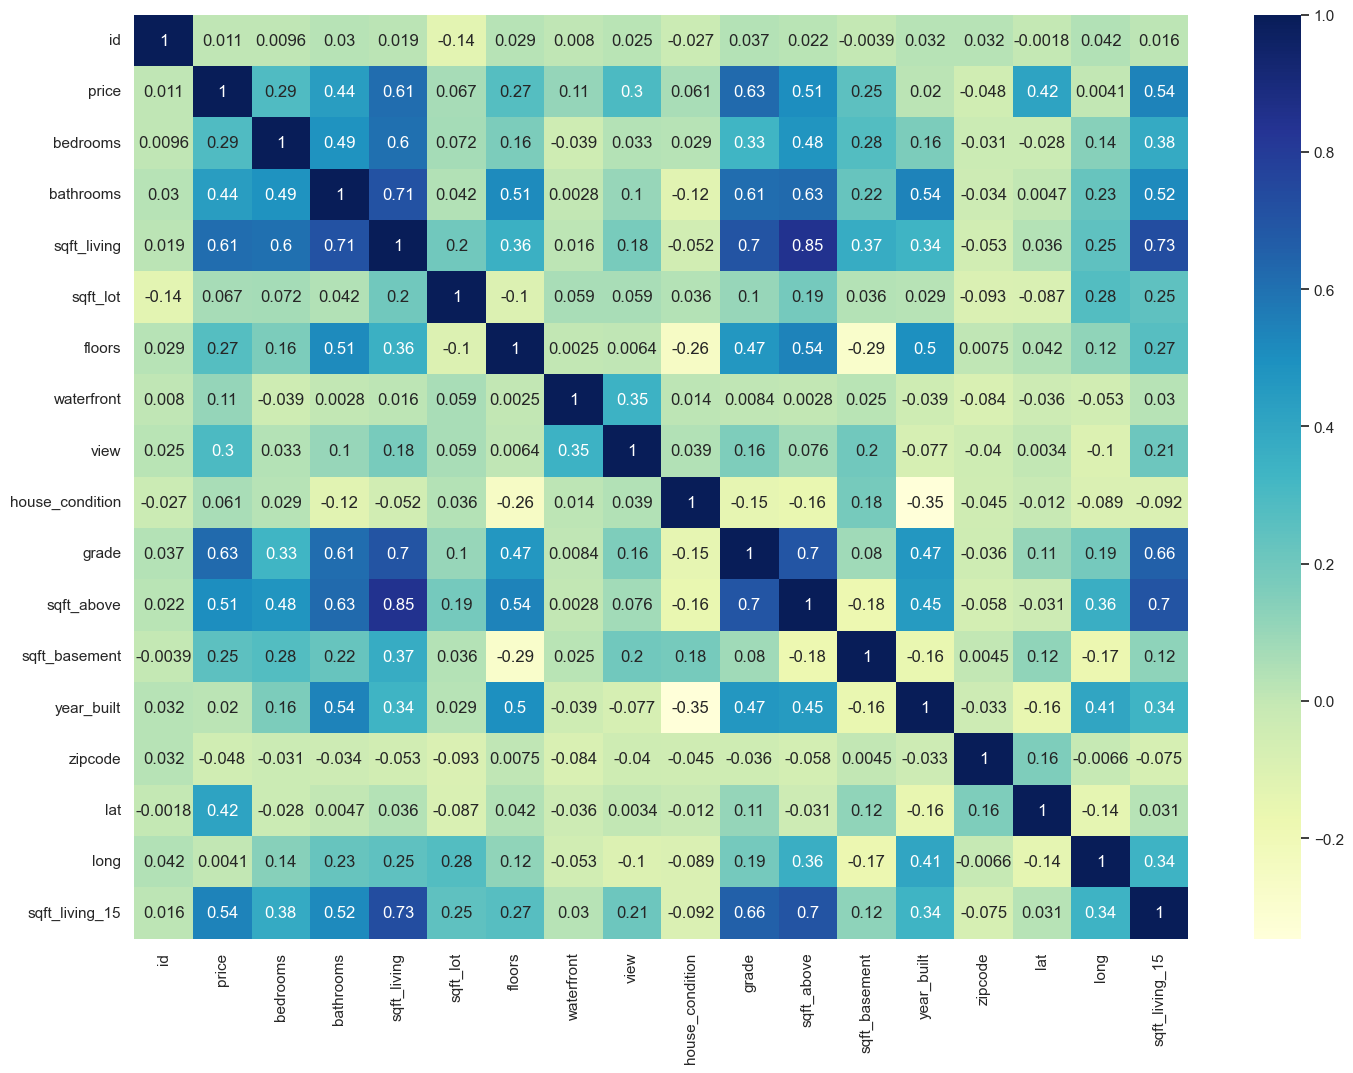

In [9]:
plt.figure(figsize=(17,12))
ax = sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [10]:
# Based on the heatmap, we can see that a strong positive linear relationship exists between house price 
# and square_foot_living, denoted by the correlation coefficietn 0.61. I will use this linear relationship
# for my linear regression model, with the independent variable being square_foot_living. 



### Step 3: Determine independent and dependent variable

In [11]:
# set X 

x1 = df['sqft_living']

# set Y 

y = df['price']


In [12]:
# visualize relationship between X and Y

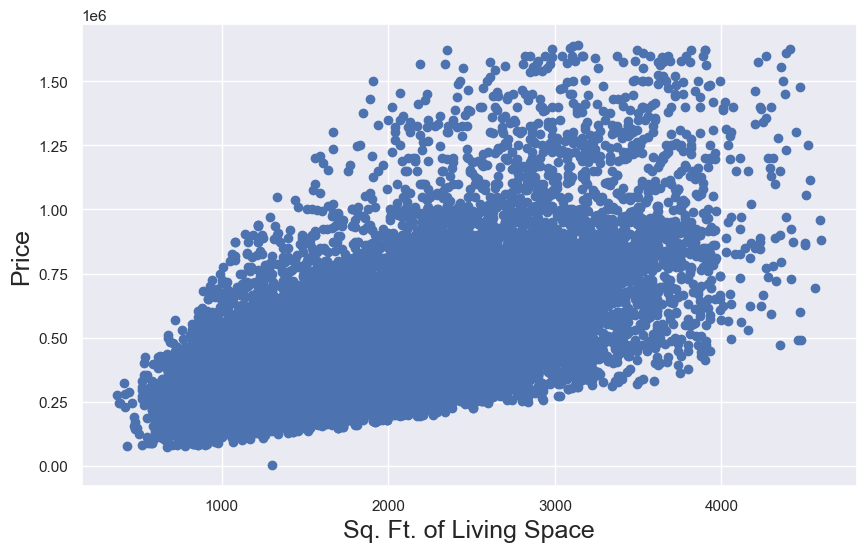

In [13]:
plt.figure(figsize = (10,6))
plt.scatter(x1,y)
plt.xlabel('Sq. Ft. of Living Space', fontsize = 18)
plt.ylabel('Price', fontsize = 18);

### Step 4: Fit Regression 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model and which statistical package is used for linear regression model.

In [14]:
# fit model to X and Y variables (you will need to make more cells)

In [15]:
x = sm.add_constant(x1)

In [16]:
results = sm.OLS(y,x).fit()

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:15:16   Log-Likelihood:            -2.7761e+05
No. Observations:               20456   AIC:                         5.552e+05
Df Residuals:                   20454   BIC:                         5.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.213e+04   3791.541     24.298      0.000    8.47e+04    9.96e+04
sqft_living   202.9775      1.829    110.966      0.000     199.392     206.563
==============================================================================
Omnibus:                     3900.816   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9054.676
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       5.434   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 5: Interpret Model Summary 

In [18]:
# print out and interpret model summary // terms identified below

Interpret the following from your model:

- R-squared 
> The model's r-squared measured the variability of the model's data. Becuase 0.376 is a lower variability, other independent variables may be needed to make a more accurate prediction. 
- Coefficient of independent variable
> The model's coefficient of the independent variable quantified the effect the square foot living variable had on
the price variable. It looks like the effect was quantified by 202.9775.
- P-value of T-statistic
> The model's p-value of the t-statistic shows if the input variable is significant or not in relation
to the Y variable. The p-value is 0.000, so in this case, we reject the null hypothesis since b1
is significant.
- P-value of F-statistic
> The f-statistic tests the overall significance of the model. Thus, if its p-value is less than 0.05, the 
overall model is significant. The p-value of the model's f-statistic is 0.00, so the overall model is 
significant. 

### Step 6: Predict Values

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [19]:
# predict new y values (dependent variables) by feeding model new independent variable values

In [20]:
new_df = pd.DataFrame({'constant':1, 'sqft_living':[1100]})
new_df

,constant,sqft_living
0,1,1100


In [21]:
predictions = results.predict(new_df)
predictions

0    315404.008401
dtype: float64

In [22]:
new_df['price_predictions'] = results.predict(new_df)
new_df

,constant,sqft_living,price_predictions
0,1,1100,315404.008401


# Part 3 - Multiple Linear Regression

### Step 1: From Data Exploration in Part 2, Pick Another Independent Variable 

In [23]:
# Pick another independent variable. Be sure to avoid multicollinearity. 

In [24]:
y = df['price']
x1 = df[['sqft_living','grade']]

### Step 2: Fit A New Multiple Linear Regression Model to the New Independent Variables

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [25]:
# fit new regression model (you will need to make more cells)

In [26]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     8419.
Date:                Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:15:16   Log-Likelihood:            -2.7629e+05
No. Observations:               20456   AIC:                         5.526e+05
Df Residuals:                   20453   BIC:                         5.526e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.116e+05   1.01e+04    -40.665      0.000   -4.31e+05   -3.92e+05
sqft_living   113.2243      2.407     47.049      0.000     108.507     117.941
grade        9.023e+04   1697.513     53.153      0.000    8.69e+04    9.36e+04
==============================================================================
Omnibus:                     4053.224   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9767.719
Skew:                           1.109   Prob(JB):                         0.00
Kurtosis:                       5.558   Cond. No.                     1.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3: Interpret Model Summary 

Print the output of the results summary from your model. Interpret the following parts of your results summary. Include an explanation of what the given numbers mean in regards to your model.
- R-squared 
> The model's r-squared measured the variability of the model's data. Becuase 0.452 is a lower variability, other independent variables may be needed to make a more accurate prediction.
- Adjusted R-squared
> The model's adjusted r-squared, like r-squared, shows the percentage of variability as explained by the regression model, but it is an improvement to r-squared as it penalizes excessive usage of independent variables that do not actually strengthen the explanatory power of the model. In this case, the multiple linear regression model's adjusted r-squared was higher than the simple linear regression model's adusted r-squared. Thus, the model was not penalized for the extra input variable, and its explanatory power was strengthened. 
- Coefficient of independent variables
> The model's coefficient of the independent variables quantified the effect the square foot living variable and the grade variable had on the price variable. It looks like the effect was quantified by 113.2243 and 9.023e+04 respectively. 
- P-value of T-statistic
> The model's p-value of the t-statistic shows if the input variables are significant or not in relation to the Y variable. The p-values are 0.000 for square foot living and 0.000 for grade, so in this case, we reject the null hypothesis since b1 for both variables is significant.
- P-value of F-statistic
> The f-statistic tests the overall significance of the model. Thus, if its p-value is less than 0.05, the overall model is significant. The p-value of the model's f-statistic is 0.00, so the overall model is significant.



If you would like, continue to create new linear models as you add more than two independent variables. Notice the differences in the R-Squared values you get from each model. 

### Step 4: Predict Values

In [27]:
# predict new y values (dependent variables) by feeding model new independent variable values

In [31]:
new_df = pd.DataFrame({'constant':1, 'sqft_living':[1200, 1500], 'grade':[6, 9]})
new_df

,constant,sqft_living,grade
0,1,1200,6
1,1,1500,9


In [32]:
new_df['price_predictions'] = results.predict(new_df)
new_df

,constant,sqft_living,grade,price_predictions
0,1,1200,6,265681.760632
1,1,1500,9,570334.599782


### Step 5: Report Observations in Difference Between Simple and Multiple Linear Regression Models You Made 

In [ ]:
# create new markdown cell and write down your observations

In [ ]:
# The adjusted r-squared for the multiple linear regression is higher than the adjusted 
# r-squared for the simple linear regression, indicating that the extra input variable increased
# the explanatory power of the model. 
# In both regression tables, the model's p-value stays the same at 0.000. Thus, both input variables
# are significant. 
# The f-statistic's p-value in both models is 0.00, so we can safely say that both models are overall
# significant. 
# Because the adjusted r-squared increased in the second model, I think the multiple regression model
# will more accurately predict new data points than the simple regression model.

# Part 4 - Multivariate Time Series Analysis

In [ ]:
# complete the time series analysis exercise separately from data-time-series folder

# Part 5 - Submit Project 